# <span style="color:red"> NUMERICAL EXERCISES 12 </span>

## <span style="color:blue">Exercise 12.1</span>

###### CREATION OF A SEQUENTIAL NEURAL NETWORK (NN)
The goal of these exercises is to use neural networks, both sequential and convolutional, to solve the classification problem of recognizing digits (0 to 9) written by hand.
The input file (aka the digit drawing) is made of $28x28$ pixels and in grayscale (0 to 255). The Keras library provides access to the MNIST dataset, which contains $70,000$ input files, divided by default into training data and test data.


Exercise 12.1 contains already written code in which a sequential neural network is constructed to solve this problem. The exercise consists of testing the network, and trying other optimizers besides Stochastic Gradient Descent (SGD).

I first report the code in the exercise text and then the code with the optimizer changes.

###### GALLI'S CODE FOR SEQUENTIAL NEURAL NETWORK (with a little change)

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

STEP 1: Load and Process the Data

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape after reshaping: (60000, 784)
X_test shape after reshaping: (10000, 784)

an example of a data point with label 4


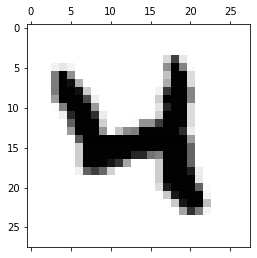

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape after reshaping:', X_train.shape)
print('X_test shape after reshaping:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

STEP 2: Define the Neural Net and its Architecture

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


STEP 3: Choose the Optimizer and the Cost Function (CHANGE: I ADDED THE OPTIMIZER AS ARGUMENT)

In [4]:
#from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model(optimizer):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


STEP 4: Train the model

In [5]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model('sgd')

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.7280 - acc: 0.7885 - val_loss: 0.3028 - val_acc: 0.9176
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3727 - acc: 0.8941 - val_loss: 0.2340 - val_acc: 0.9324
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3016 - acc: 0.9159 - val_loss: 0.1969 - val_acc: 0.9421
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2598 - acc: 0.9275 - val_loss: 0.1721 - val_acc: 0.9476
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2301 - acc: 0.9351 - val_loss: 0.1573 - val_acc: 0.9500


STEP 5: Evaluate the Model Performance on the *Unseen* Test Data

313/313 [==============================] - 1s 2ms/step - loss: 0.1573 - acc: 0.9500

Test loss: 0.1572829782962799
Test accuracy: 0.949999988079071


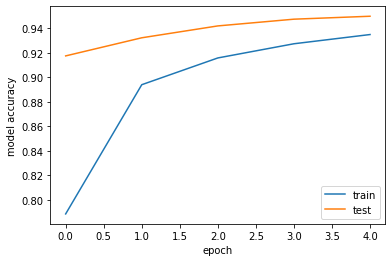

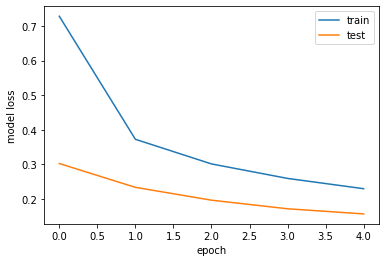

In [6]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

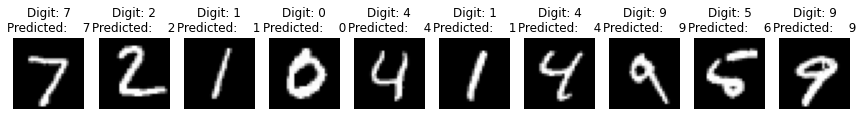

In [7]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

###### CHANGES OF OPTIMIZER

Before changing the optimizer I raise the number of epochs from 5 to 10.
Among the optimizers, in addition to stochastic gradient descent (*sgd*) I test the *Adagrad*, *Adam* and *Adadelta*. From all of them I will choose the one with the highest accuracy (average probability of guessing the test figure)

CONSTRUCTION, COMPILATION AND TRAIN OF THE 4 MODELS

In [8]:
# Reshaping data
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# Parameters
batch_size = 32
epochs = 10

# Construction and compilation of the 4 NNs
model_sgd = compile_model('sgd')
model_adagrad = compile_model('adagrad')
model_adam = compile_model('adam')
model_adadelta = compile_model('adadelta')

# Train of the 4 models
history_sgd = model_sgd.fit(X_train, Y_train, batch_size=batch_size,
              epochs=epochs, verbose=1, validation_data=(X_test, Y_test))
history_adagrad = model_adagrad.fit(X_train, Y_train, batch_size=batch_size,
              epochs=epochs, verbose=1, validation_data=(X_test, Y_test))
history_adam = model_adam.fit(X_train, Y_train, batch_size=batch_size,
              epochs=epochs, verbose=1, validation_data=(X_test, Y_test))
history_adadelta = model_adadelta.fit(X_train, Y_train, batch_size=batch_size,
              epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7788 - acc: 0.7703 - val_loss: 0.3175 - val_acc: 0.9117
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3905 - acc: 0.8891 - val_loss: 0.2432 - val_acc: 0.9312
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3118 - acc: 0.9111 - val_loss: 0.2024 - val_acc: 0.9420
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2666 - acc: 0.9245 - val_loss: 0.1762 - val_acc: 0.9494
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2372 - acc: 0.9332 - val_loss: 0.1589 - val_acc: 0.9524
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2131 - acc: 0.9401 - val_loss: 0.1435 - val_acc: 0.9574
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1921 - acc: 0.9459 - val_loss: 0.1306 - val_acc: 0.9597
Epoch 8/10
1875/1875 [==============================] - 7s 4ms

EVALUATION OF THE MODELS, REPRESENTATION OF LOSS FUNCTIONS AND ACCURACIES

313/313 [==============================] - 1s 2ms/step - loss: 0.9465 - acc: 0.8226

SGD. Test loss : 0.10800786316394806
SGD. Test accuracy: 0.9679999947547913

Adagrad. Test loss : 0.25421059131622314
Adagrad. Test accuracy: 0.9275000095367432

Adam. Test loss : 0.09965259581804276
Adam. Test accuracy: 0.9811000227928162

Adadelta. Test loss : 0.9465257525444031
Adadelta. Test accuracy: 0.8226000070571899


Text(0.5, 1.0, 'Adadelta Loss. Test loss: 0.9465257525444031')

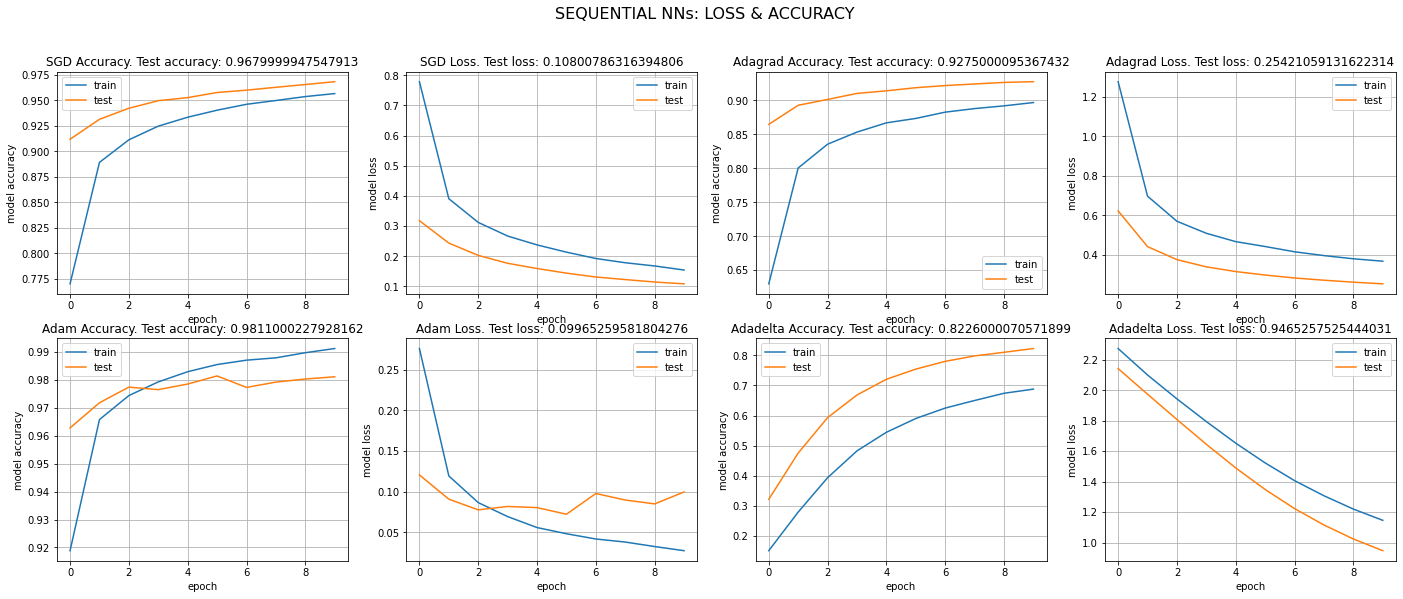

In [9]:
# Evaluation of the 4 models
score_sgd = model_sgd.evaluate(X_test, Y_test, verbose=1)
score_adagrad = model_adagrad.evaluate(X_test, Y_test, verbose=1)
score_adam = model_adam.evaluate(X_test, Y_test, verbose=1)
score_adadelta = model_adadelta.evaluate(X_test, Y_test, verbose=1)

# Print of the performances of the 4 models
print()
print('SGD. Test loss :', score_sgd[0])
print('SGD. Test accuracy:', score_sgd[1])
print()
print('Adagrad. Test loss :', score_adagrad[0])
print('Adagrad. Test accuracy:', score_adagrad[1])
print()
print('Adam. Test loss :', score_adam[0])
print('Adam. Test accuracy:', score_adam[1])
print()
print('Adadelta. Test loss :', score_adadelta[0])
print('Adadelta. Test accuracy:', score_adadelta[1])

# look into training history
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8))=plt.subplots(2,4,  figsize=(24, 9))
fig.suptitle("SEQUENTIAL NNs: LOSS & ACCURACY", size =16)

ax1.plot(history_sgd.history['acc'])
ax1.plot(history_sgd.history['val_acc'])
ax1.set_ylabel('model accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid(True)
ax1.set_title("SGD Accuracy. Test accuracy: " + str(score_sgd[1]))
ax2.plot(history_sgd.history['loss'])
ax2.plot(history_sgd.history['val_loss'])
ax2.set_ylabel('model loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='best')
ax2.grid(True)
ax2.set_title("SGD Loss. Test loss: " + str(score_sgd[0]))

ax3.plot(history_adagrad.history['acc'])
ax3.plot(history_adagrad.history['val_acc'])
ax3.set_ylabel('model accuracy')
ax3.set_xlabel('epoch')
ax3.legend(['train', 'test'], loc='best')
ax3.grid(True)
ax3.set_title("Adagrad Accuracy. Test accuracy: " + str(score_adagrad[1]))
ax4.plot(history_adagrad.history['loss'])
ax4.plot(history_adagrad.history['val_loss'])
ax4.set_ylabel('model loss')
ax4.set_xlabel('epoch')
ax4.legend(['train', 'test'], loc='best')
ax4.grid(True)
ax4.set_title("Adagrad Loss. Test loss: " + str(score_adagrad[0]))

ax5.plot(history_adam.history['acc'])
ax5.plot(history_adam.history['val_acc'])
ax5.set_ylabel('model accuracy')
ax5.set_xlabel('epoch')
ax5.legend(['train', 'test'], loc='best')
ax5.grid(True)
ax5.set_title("Adam Accuracy. Test accuracy: " + str(score_adam[1]))
ax6.plot(history_adam.history['loss'])
ax6.plot(history_adam.history['val_loss'])
ax6.set_ylabel('model loss')
ax6.set_xlabel('epoch')
ax6.legend(['train', 'test'], loc='best')
ax6.grid(True)
ax6.set_title("Adam Loss. Test loss: " + str(score_adam[0]))

ax7.plot(history_adadelta.history['acc'])
ax7.plot(history_adadelta.history['val_acc'])
ax7.set_ylabel('model accuracy')
ax7.set_xlabel('epoch')
ax7.legend(['train', 'test'], loc='best')
ax7.grid(True)
ax7.set_title("Adadelta Accuracy. Test accuracy: " + str(score_adadelta[1]))
ax8.plot(history_adadelta.history['loss'])
ax8.plot(history_adadelta.history['val_loss'])
ax8.set_ylabel('model loss')
ax8.set_xlabel('epoch')
ax8.legend(['train', 'test'], loc='best')
ax8.grid(True)
ax8.set_title("Adadelta Loss. Test loss: " + str(score_adadelta[0]))

It is clear from the graphs that the most effective optimizer in this case is the *Adam*, although not by much compared to the *sgd*. Therefore in the sequel I will use the *Adam*.

## <span style="color:blue">Exercise 12.2</span>

###### CREATION OF A CONVOLUTIONAL NEURAL NETWORK (CNN)
The exercise proposes to develop a convolutional neural network (CNN) to solve the same problem as before, and finally compare the results of this new network with those of the sequential neural network (NN) created above.

The architecture of the CNN is shown below using the summary method. I used, before the normal sequential layers, two layers with convolutional filters and maxpooling. 

In [10]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [11]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 6 filters (dimensionality of output space) + maxpooling
    model.add(Conv2D(6, kernel_size=(5, 5),
                     activation='selu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))
    #add second convolutional layer with 16 filters (dimensionality of output space) + maxpooling
    model.add(Conv2D(16, kernel_size=(5, 5),
                     activation='selu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))
    model.add(Flatten())
    #add third layer
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='selu'))
    #add fourth layer
    model.add(Dense(100, activation='selu'))
    #add layer output
    model.add(Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['acc'])
    return model

In [12]:
# training parameters
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()
model_CNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)              

In [13]:
# train CNN
history_CNN = model_CNN.fit(X_train, Y_train,
             batch_size=batch_size,
             epochs=epochs,
             verbose=1,
             validation_data=(X_test, Y_test))

# evaliate model
score_CNN = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('CNN. Test loss:', score_CNN[0])
print('CNN. Test accuracy:', score_CNN[1])

Epoch 1/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2805 - acc: 0.9125 - val_loss: 0.0852 - val_acc: 0.9725
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1364 - acc: 0.9575 - val_loss: 0.0455 - val_acc: 0.9851
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1076 - acc: 0.9661 - val_loss: 0.0490 - val_acc: 0.9845
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0987 - acc: 0.9698 - val_loss: 0.0433 - val_acc: 0.9857
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0910 - acc: 0.9720 - val_loss: 0.0456 - val_acc: 0.9855
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0825 - acc: 0.9743 - val_loss: 0.0351 - val_acc: 0.9894
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0762 - acc: 0.9770 - val_loss: 0.0369 - val_acc: 0.9899
Epoch 8/10
1875/1875 [==========================

##### COMPARISON OF NEURAL NETWORK AND CONVOLUTIONAL NEURAL NETWORK

Text(0.5, 1.0, 'CNN Loss. Test loss: 0.0464722216129303')

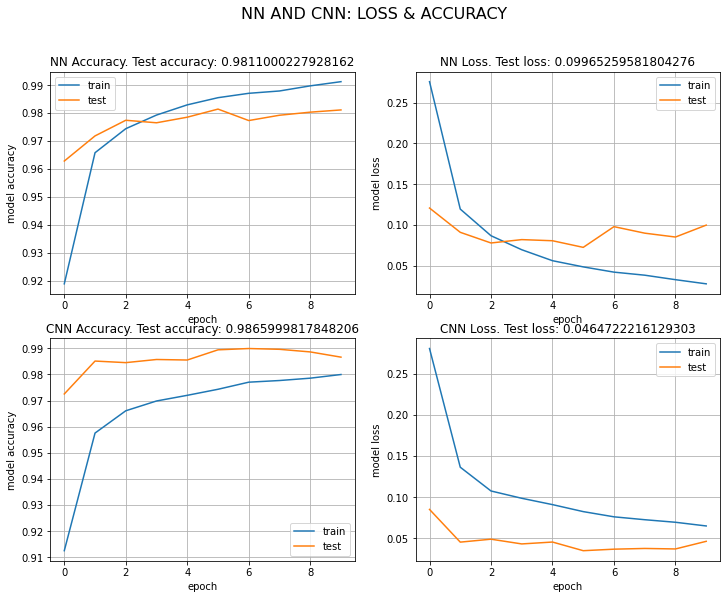

In [14]:
fig, ((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,  figsize=(12, 9))
fig.suptitle("NN AND CNN: LOSS & ACCURACY", size =16)

# History for accuracies
ax1.plot(history_adam.history['acc'])
ax1.plot(history_adam.history['val_acc'])
ax1.set_ylabel('model accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid(True)
ax1.set_title("NN Accuracy. Test accuracy: " + str(score_adam[1]))
ax2.plot(history_adam.history['loss'])
ax2.plot(history_adam.history['val_loss'])
ax2.set_ylabel('model loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='best')
ax2.grid(True)
ax2.set_title("NN Loss. Test loss: " + str(score_adam[0]))

ax3.plot(history_CNN.history['acc'])
ax3.plot(history_CNN.history['val_acc'])
ax3.set_ylabel('model accuracy')
ax3.set_xlabel('epoch')
ax3.legend(['train', 'test'], loc='best')
ax3.grid(True)
ax3.set_title("CNN Accuracy. Test accuracy: " + str(score_CNN[1]))
ax4.plot(history_CNN.history['loss'])
ax4.plot(history_CNN.history['val_loss'])
ax4.set_ylabel('model loss')
ax4.set_xlabel('epoch')
ax4.legend(['train', 'test'], loc='best')
ax4.grid(True)
ax4.set_title("CNN Loss. Test loss: " + str(score_CNN[0]))

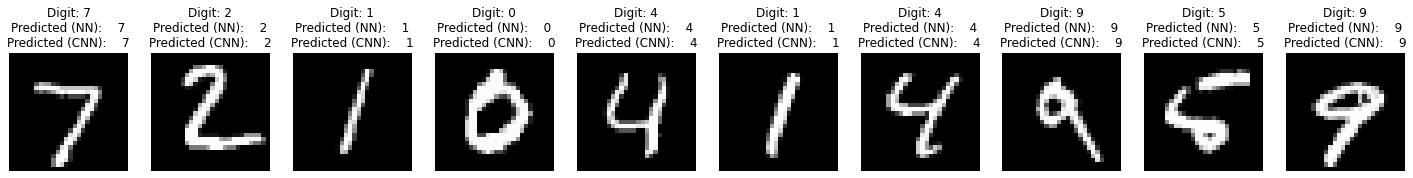

In [15]:
predictions_CNN = model_CNN.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions_adam = model_adam.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
 
plt.figure(figsize=(25, 25)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted (NN):    {}\nPredicted (CNN):    {}".format(np.argmax(Y_test[i]), np.argmax(predictions_adam[i]), np.argmax(predictions_CNN[i])))    
    plt.axis('off') 
plt.show()

As can be seen from the graphs above, CNN gets better results than NN (accuracy of 98.7% vs. 98.1%). However, the two networks are both very good, as can be seen from the last cell, in which I make the two networks guess 10 digits taken at random from the MNIST dataset.

## <span style="color:blue">Exercise 12.3</span>

###### RECOGNIZING MY CALLIOGRAPHY

The exercise proposes to test the models created on external data, that is, the digits 0 to 9 written by me.
I wrote the figures using the application *gimp* and imported the images into the JN.

I expect the two neural networks to perform worse with my data than with the MNIST data, because the train was done on the MNIST dataset, and my handwriting which is different may not be recognized. In other words, the neural networks built do not claim to recognize digits written in any kind of handwriting.

Saving 0.png to 0 (6).png
Saving 1.png to 1 (5).png
Saving 2.png to 2 (5).png
Saving 3.png to 3 (5).png
Saving 4.png to 4 (5).png
Saving 5.png to 5 (5).png
Saving 6.png to 6 (5).png
Saving 7.png to 7 (5).png
Saving 8.png to 8 (5).png
Saving 9.png to 9 (5).png


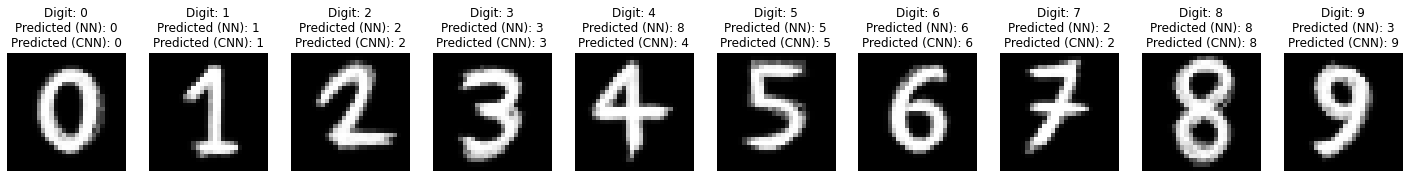

In [16]:
# TO LOAD FILES ON GOOGLE COLAB
from google.colab import files
upload = files.upload() #this will let you browse and choose the file to be uploaded

from PIL import Image
import os

digit =[]
pix=[]
data=[]

#UPLOAD E SISTEMAZIONE
for i in range(10):
  im=Image.open(str(i)+".png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE
  digit.append(im)
  ydim, xdim = digit[i].size
  data.append(np.zeros((xdim,ydim)))
  pix.append(digit[i].load())
  for j in range(ydim):
      for k in range(xdim):
        data[i][k,j]=pix[i][j,k]/255

#GUESS DELLE RETI
pred_NN=[]
pred_CNN=[]
for i in range(10):
    data[i] = data[i].reshape(1,xdim,ydim,1)
    pred_CNN.append(model_CNN.predict(data[i]))
for i in range(10):
    data[i] = data[i].reshape(data[i].shape[0],xdim*ydim)
    pred_NN.append(model_adam.predict(data[i]))

for i in range(10):
    data[i] = data[i].reshape(xdim,ydim)

plt.figure(figsize=(25, 25)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data[i], cmap='gray')
    plt.title("Digit: {}\nPredicted (NN): {}\nPredicted (CNN): {}".format(i, np.argmax(pred_NN[i]), np.argmax(pred_CNN[i])))
    plt.axis('off')
plt.show()

The non-convolutional neural network recognizes 7 out of 10 digits, while the convolutional one recognizes 9 out of 10 digits. So I can conclude that, although on the MNIST data the two networks were basically equivalent, the CNN has a more articulated structure that allows it to perform well even on data of a shape never seen before, such as precisely the digits written in my handwriting.